<a href="https://colab.research.google.com/github/carlostamayo636/cd_202202_Carlos_Tamayo/blob/main/Proyecto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 24.2 MB/s 


In [ ]:
import pandas as pd

ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'

df = pd.read_csv(ruta)

In [ ]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [ ]:
from datetime import datetime

In [ ]:
df['fec_not2'] = pd.to_datetime(df['fec_not'], format = '%d/%m/%Y')

In [ ]:
#Creación de la proyección
import pyproj 

p = pyproj.Proj(proj='utm', zone = 18, elips = 'WGS84', preserve_units = True)

In [ ]:
df['x'], df['y'] = p(df['longitud'], df['latitud'])

In [ ]:
#Info alcaldia
alc_x = -73.0861716627613
alc_y = 7.0629502916083196

utm_alc_x, utm_alc_y = p(alc_x, alc_y)

#Encontrar la distancia
((utm_alc_x - df['x'])**2 + (utm_alc_y - df['y'])**2)**0.5

0       2311.379966
1       2804.112415
2       3070.761591
3        725.053028
4       2123.835294
           ...     
1257    1818.328553
1258    1943.308421
1259    3669.089479
1260    1214.202506
1261     634.633845
Length: 1262, dtype: float64

In [ ]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object', 'datetime64'])
datosf = datosf.drop('año', axis = 1)
datosf = datosf.drop('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)

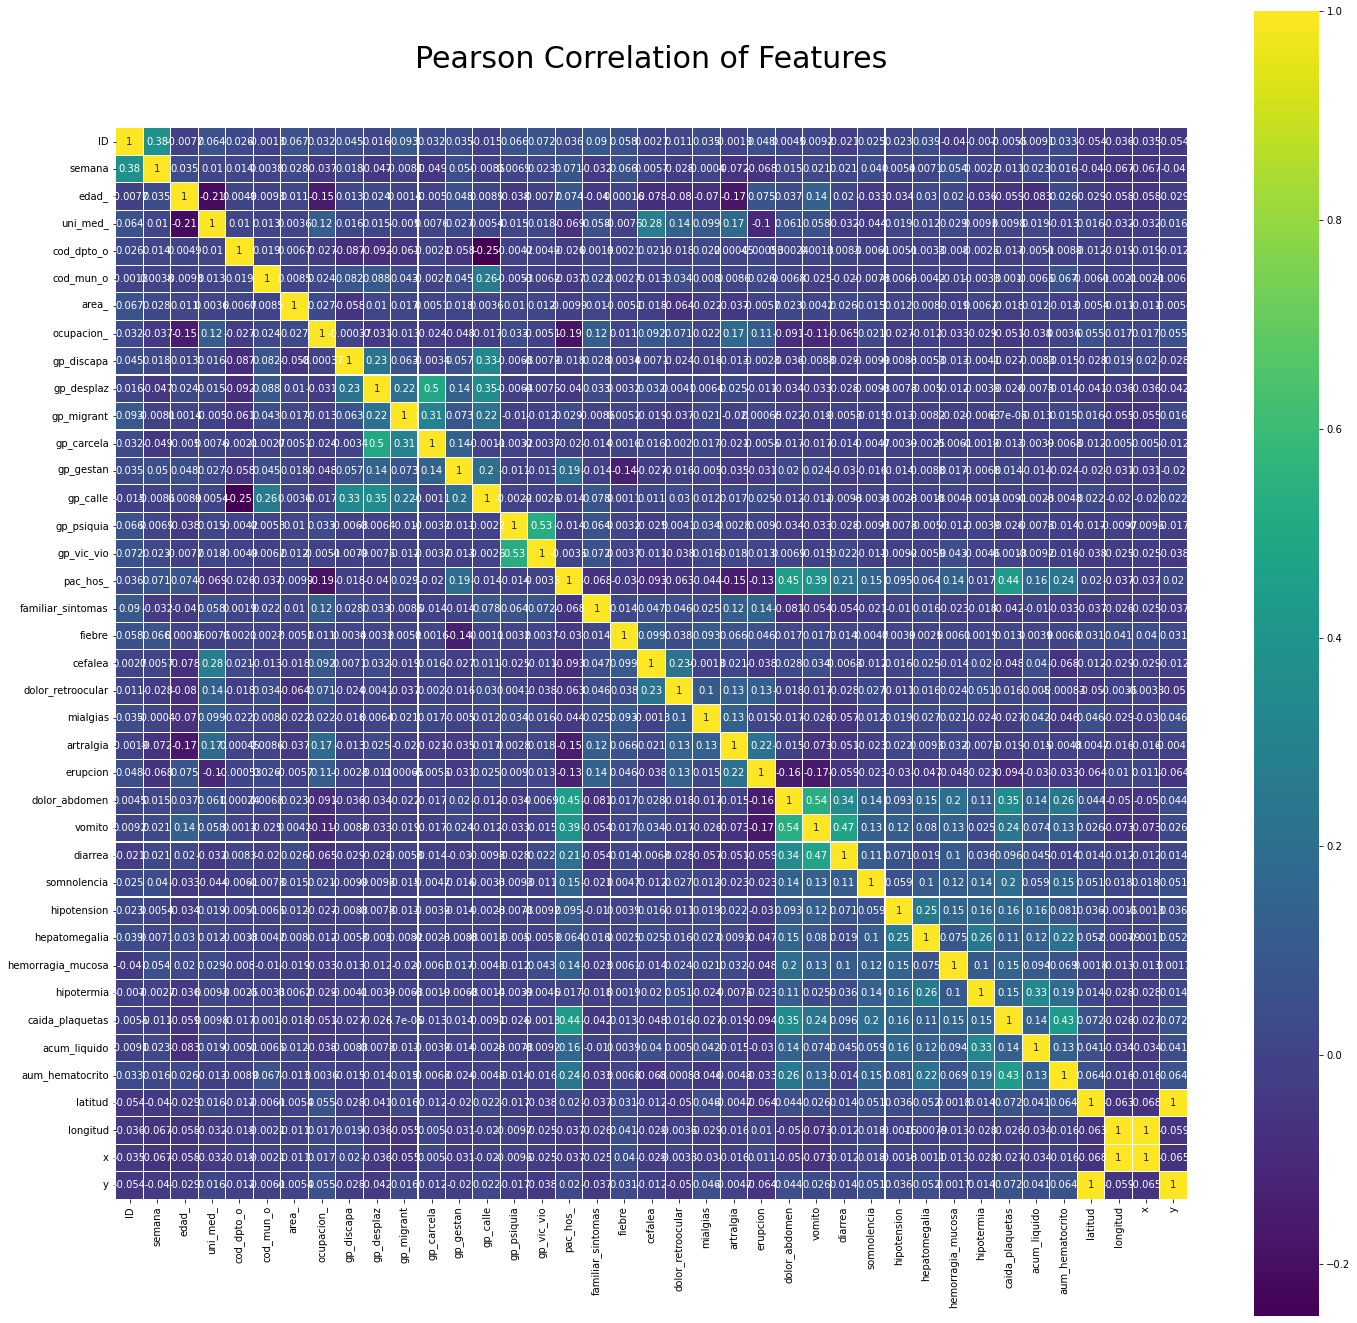

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize=(24, 24))
plt.title('Pearson Correlation of Features', y=1.05, size=30)
sb.heatmap(datosf.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [ ]:
from math import ceil

ab = 100
res = 10
minx = datosf['x'].min() - ab
maxx = datosf['x'].max() + ab


miny = datosf['y'].min() - ab
maxy = datosf['y'].max() + ab

print(minx)
print(maxx)
print(miny)
print(maxy)

len_x = ceil((maxx-minx)/res)
len_y = ceil((maxy-miny)/res)

707888.5715792507
712463.8865034583
780401.6340403266
785151.1759298786


In [ ]:
import numpy as np
M1 = np.zeros((len_y, len_x))
print(M1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


***Mapas de calor***

In [ ]:
import numpy as np
import math

In [ ]:
fullX = df['x']
fullY = df['y']

bandWidth = 100 #metros mínimos en los que un dato afecta otro
res = 10 #Resolución del mapa

x_min=min(fullX) - bandWidth
x_max=max(fullX) + bandWidth
y_min=min(fullY) - bandWidth
y_max=max(fullY) + bandWidth

rows = math.ceil((y_max - y_min)/res)
collums = math.ceil((x_max - x_min)/res)

dataArr = np.zeros((rows, collums))

for i in range(len(fullX)):
  x = fullX[i]
  y = fullY[i]

  row = math.floor((y-y_min)/res)
  collum = math.floor((x-x_min)/res)
  dataArr[row][collum] += 1

print(len(dataArr))
print(len(dataArr[0]))

475
458


In [ ]:
#Opción 1
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P
#Opción 2
def kde_epanechnikov(d,h):
    dn=d/h
    P=(3/4)*(1-dn**2)
    return P
#Opción 3
def kde_gaussian(d,h):
    dn=d/h
    P=math.e**(-(dn**2)/2)/math.sqrt(2*math.pi)
    return P
#Opción 4
def kde_varMin(d,h):
    dn=d/h
    P=3/8*(3-5*dn**2)
    return P
#Opción 5
def kde_uniform():
  return 0.5
  
#Opción 6
def kde_triangular(d,h):
  dn = d/h
  return 1-abs(dn)

In [ ]:
#Selector de función
def kernel_selection(kernel_function, d, bw):
  kernel = 0
  if (kernel_function == 1):
    kernel = kde_quartic(d, bw)
  elif (kernel_function == 2):
    kernel = kde_epanechnikov(d,bw)
  elif (kernel_function == 3):
    kernel = kde_gaussian(d, bw)
  elif (kernel_function == 4):
    kernel = kde_varMin(d, bw)
  elif (kernel_function == 5):
    kernel = kde_uniform()
  elif (kernel_function == 6):
    kernel = kde_triangular(d, bw)
  return kernel

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

***Quartic***

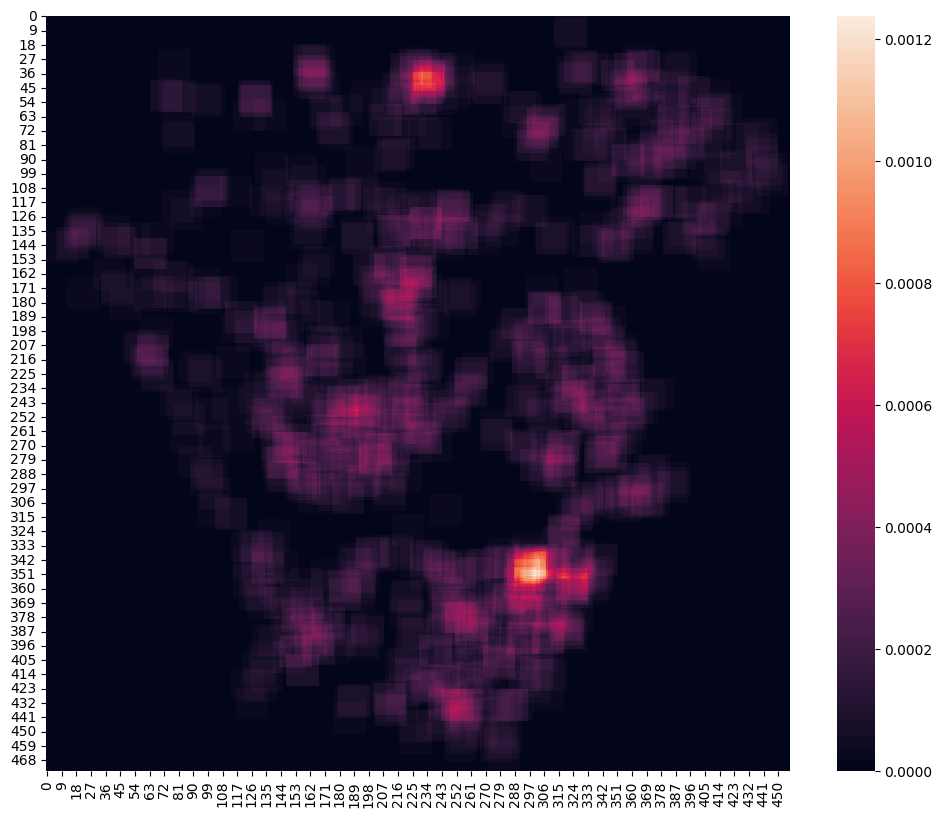

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(1, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Epanechnikov***

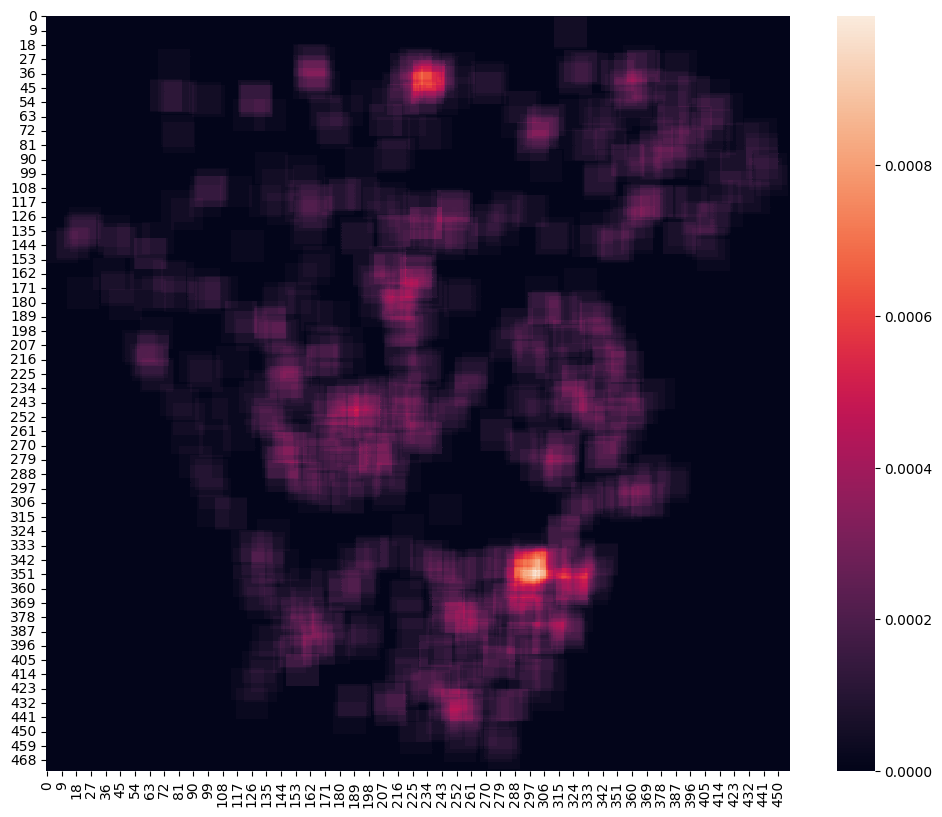

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(2, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Guassiana***

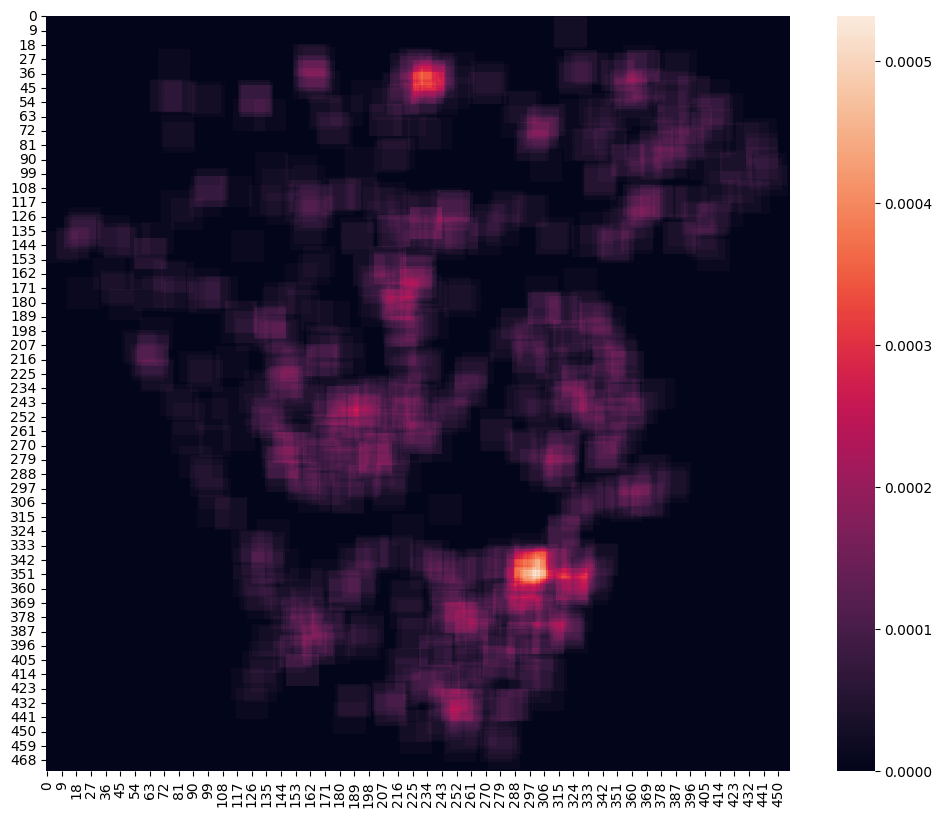

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(3, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Varianza Minima***

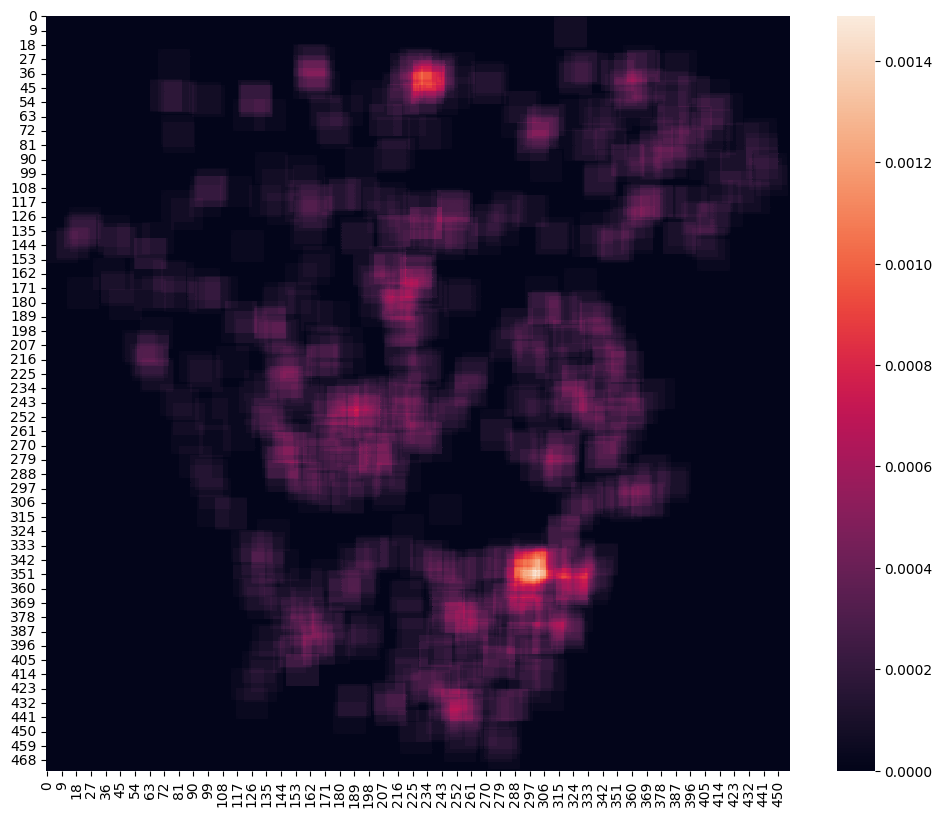

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(4, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Uniforme***

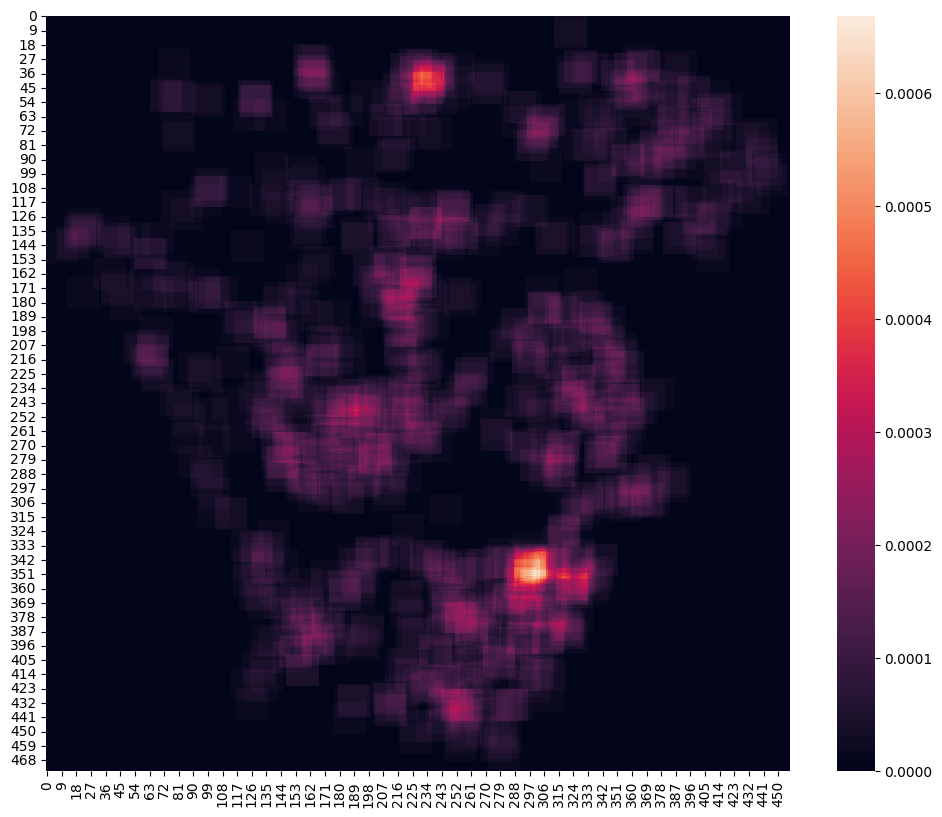

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(5, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Triangular***

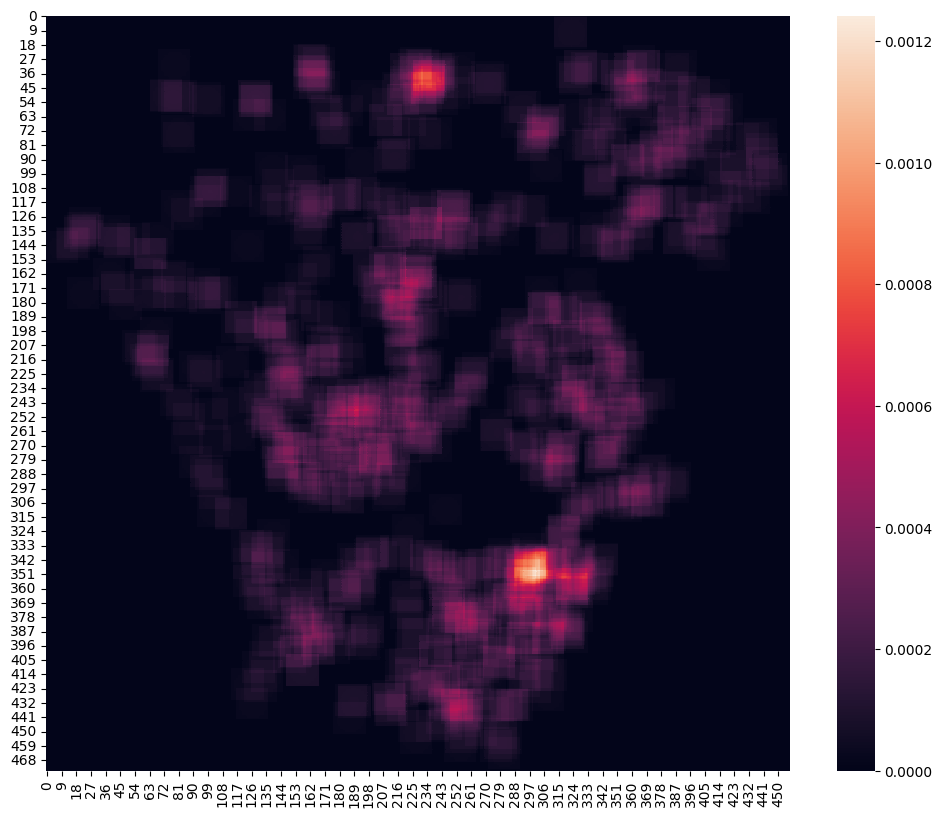

In [ ]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(6, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

***Text mapas***

In [ ]:
!pip install cython
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 55.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 85 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 62.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█████████████████████

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely #cartografia y shapely no son amigos
!pip install shapely --no-binary shapely

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [ ]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscalinternacional.com/cartografia/'

file_list = ["68276_manzanas.cpg", "68276_manzanas.dbf", "68276_manzanas.prj", "68276_manzanas.qpj", "68276_manzanas.shp", "68276_manzanas.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

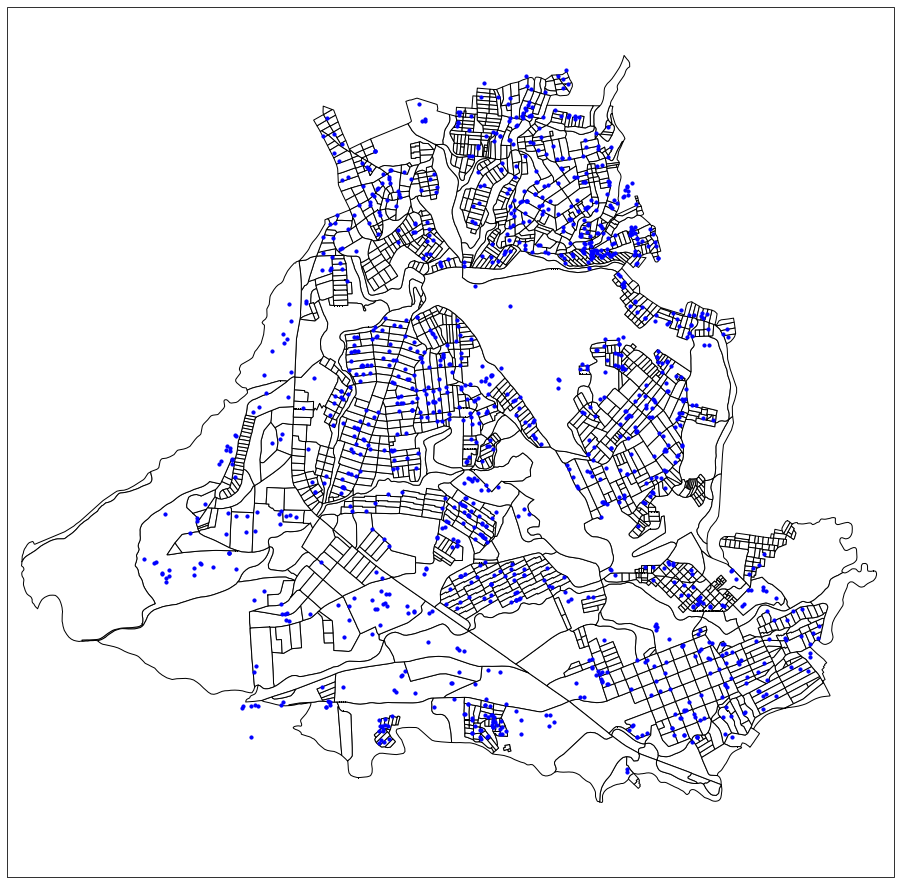

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_manzanas')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='black')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()